In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

import Quandl
from n472jw.secrets import quandl_api_key

Populating the interactive namespace from numpy and matplotlib


# I. Get Data

In [89]:
data = Quandl.get('WIKI/CSCO')
data = data[pd.datetime(2015, 1, 1):]

## Heuristic: Get Gaps
Gap definition: previous day low is lower next day high

In [90]:
######[ PARAMS ]#####
up_thresh = 1
down_thresh = 1
#####################

#=====[ Step 1: reindex ]=====
df = data[['Low', 'High', 'Open', 'Close']].copy()
df['Date'] = df.index
df.index = range(len(df))

#=====[ Step 2: find gaps ]=====
lows = np.array(df.iloc[0:-1].Low)

down_gap_amounts = (np.array(df[0:-1].Low) - np.array(df[1:].High))
down_gaps = down_gap_amounts > 0
up_gap_amounts = (np.array(df[1:].Low) - np.array(df[0:-1].High))
up_gaps = up_gap_amounts > 0
up_gaps = (df[1:].Low > df[0:-1].High)

#=====[ Step 3: reintegrate into series ]=====
df['down_gap_amount'] = np.nan
df['down_gap_amount'].iloc[1:] = down_gap_amounts
df['down_gap'] = df.down_gap_amount > down_thresh

df['up_gap_amount'] = np.nan
df['up_gap_amount'].iloc[1:] = up_gap_amounts
df['up_gap'] = df.up_gap_amount > up_thresh

#=====[ Step 4: find occurrences ]=====
df.index = df['Date']
df = df.drop(['Date'], axis=1)
down_df = df[df.down_gap][['Low', 'High', 'Open', 'Close', 'down_gap_amount']]
up_df = df[df.up_gap][['Low', 'High', 'Open', 'Close', 'up_gap_amount']]

## Plot Occurrences

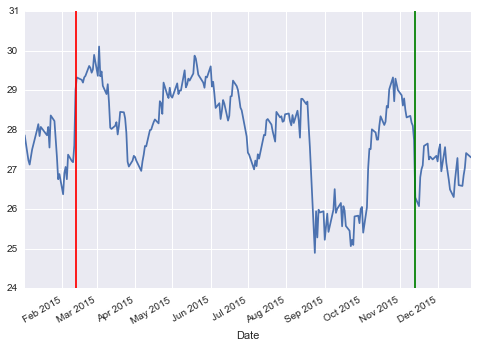

In [91]:
df['Open'].plot()
ax = plt.gca()

for ix, row in up_df.iterrows():
    ax.axvline(x=row.name, color='r')

for ix, row in down_df.iterrows():
    ax.axvline(x=row.name, color='g')

In [56]:
df[df.up_gap]

,Low,High,Date,down_gap_amount,down_gap,up_gap_amount,up_gap
3,25.8700,26.0000,1980-12-17,-0.7500,False,0.5000,True
4,26.6300,26.7500,1980-12-18,-0.8800,False,0.6300,True
5,28.2500,28.3800,1980-12-19,-1.7500,False,1.5000,True
6,29.6300,29.7500,1980-12-22,-1.5000,False,1.2500,True
7,30.8800,31.0000,1980-12-23,-1.3700,False,1.1300,True
8,32.5000,32.6300,1980-12-24,-1.7500,False,1.5000,True
9,35.5000,35.6200,1980-12-26,-3.1200,False,2.8700,True
10,36.0000,36.1300,1980-12-29,-0.6300,False,0.3800,True
13,34.5000,34.7500,1981-01-02,-0.6200,False,0.2500,True
18,31.8800,32.0000,1981-01-09,-1.7500,False,1.5100,True


In [2]:
from sklearn.pipeline import Pipeline

class GapsGetFilled(object):
    """do gaps always get filled?"""
    def fit(self, X, y):
        pass
    
    def transform(self, df):
        #=====[ Step 1: reindex ]=====
        df = data[['Low', 'High']].copy()
        df['Date'] = df.index
        df.index = range(len(df))

        #=====[ Step 2: find gaps ]=====
        down_gap_amounts = (df[0:-1].Low - df[1:].High)
        down_gaps = down_gap_amounts > 0
        up_gap_amounts = (df[1:].Low - df[0:-1].High)
        up_gaps = up_gap_amounts > 0
        up_gaps = (df[1:].Low > df[0:-1].High) # should start at 1-index

        #=====[ Step 3: reintegrate into series ]=====
        df['down_gap_amounts'] = np.nan
        df['up_gap_amounts'] = np.nan
        df['down_gap_amounts'].iloc[1:] = down_gap_amounts
        df['up_gap_amounts'].iloc[1:] = up_gap_amounts
        df.index = df['Date']

ImportError: cannot import name Transform